https://www.researchgate.net/publication/335639737_Digital_processing_and_automatic_picking_of_seismic_signals

See methodology here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt

In [2]:
datafile1=pd.read_csv('elcentro_EW.dat',sep=' ')#the east west component of seismic wave
datafile2=pd.read_csv('elcentro_NS.dat',sep=' ')#the north-south component of seismic wave
datafile3=pd.read_csv('elcentro_UP.dat',sep=' ')#the vertical component of seismic wave
print('For data file 1:','\n',datafile1.describe())
print('For data file 2:','\n',datafile2.describe())
print('For data file 3:','\n',datafile3.describe())

For data file 1: 
               time  acceleration
count  2674.000000   2674.000000
mean     26.730000     -0.000218
std      15.441233      0.039617
min       0.000000     -0.182526
25%      13.365000     -0.013358
50%      26.730000     -0.000102
75%      40.095000      0.011115
max      53.460000      0.214137
For data file 2: 
               time  acceleration
count  2688.000000   2688.000000
mean     26.870000      0.000049
std      15.522062      0.046928
min       0.000000     -0.268181
25%      13.435000     -0.012746
50%      26.870000     -0.000306
75%      40.305000      0.010936
max      53.740000      0.348737
For data file 3: 
               time  acceleration
count  2690.000000   2690.000000
mean     26.890000     -0.000049
std      15.533609      0.024105
min       0.000000     -0.210058
25%      13.445000     -0.004665
50%      26.890000     -0.000102
75%      40.335000      0.004589
max      53.780000      0.193743


2674
2700


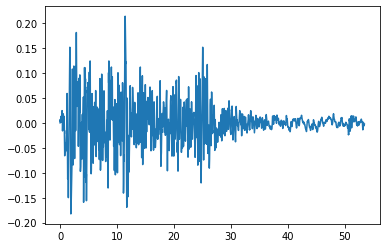

In [3]:
time=datafile1.iloc[0::,0]#time
accl_EW=datafile1.iloc[0::,1]#acceleration
plt.plot(time,accl_EW)
print(np.size(accl_EW))
accl_EW=list(accl_EW)
accl_EW=np.array(accl_EW)
accl_EW=accl_EW-np.ones(np.size(accl_EW))*np.mean(accl_EW)#detrending the data  
accl_EW=list(accl_EW)
for i in range(26):
    accl_EW.append(0)
print(np.size(accl_EW))

2688
2700


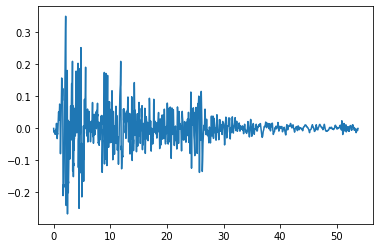

In [4]:
time=datafile2.iloc[0::,0]#time
accl_NS=datafile2.iloc[0::,1]#acceleration
plt.plot(time,accl_NS)
print(np.size(accl_NS))
accl_NS=list(accl_NS)
accl_NS=np.array(accl_NS)
accl_NS=accl_NS-np.ones(np.size(accl_NS))*np.mean(accl_NS)#detrending the data  
accl_NS=list(accl_NS)
for i in range(12):
    accl_NS.append(0)
print(np.size(accl_NS))

2690
2700


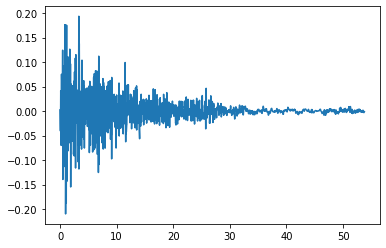

In [5]:
time=datafile3.iloc[0::,0]#time
accl_UP=datafile3.iloc[0::,1]#acceleration
plt.plot(time,accl_UP)
print(np.size(accl_UP))
accl_UP=list(accl_UP)
accl_UP=np.array(accl_UP)
accl_UP=accl_UP-np.ones(np.size(accl_UP))*np.mean(accl_UP)#detrending the data  
accl_UP=list(accl_UP)
for i in range(10):
    accl_UP.append(0)
print(np.size(accl_UP))

In [6]:
Input=list()
Input.append(accl_EW)
Input.append(accl_NS)
Input.append(accl_UP)

In [7]:
Directions={0:'E-W',1:'N-S',2:'UP'}

C:\Users\anmol harshana\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


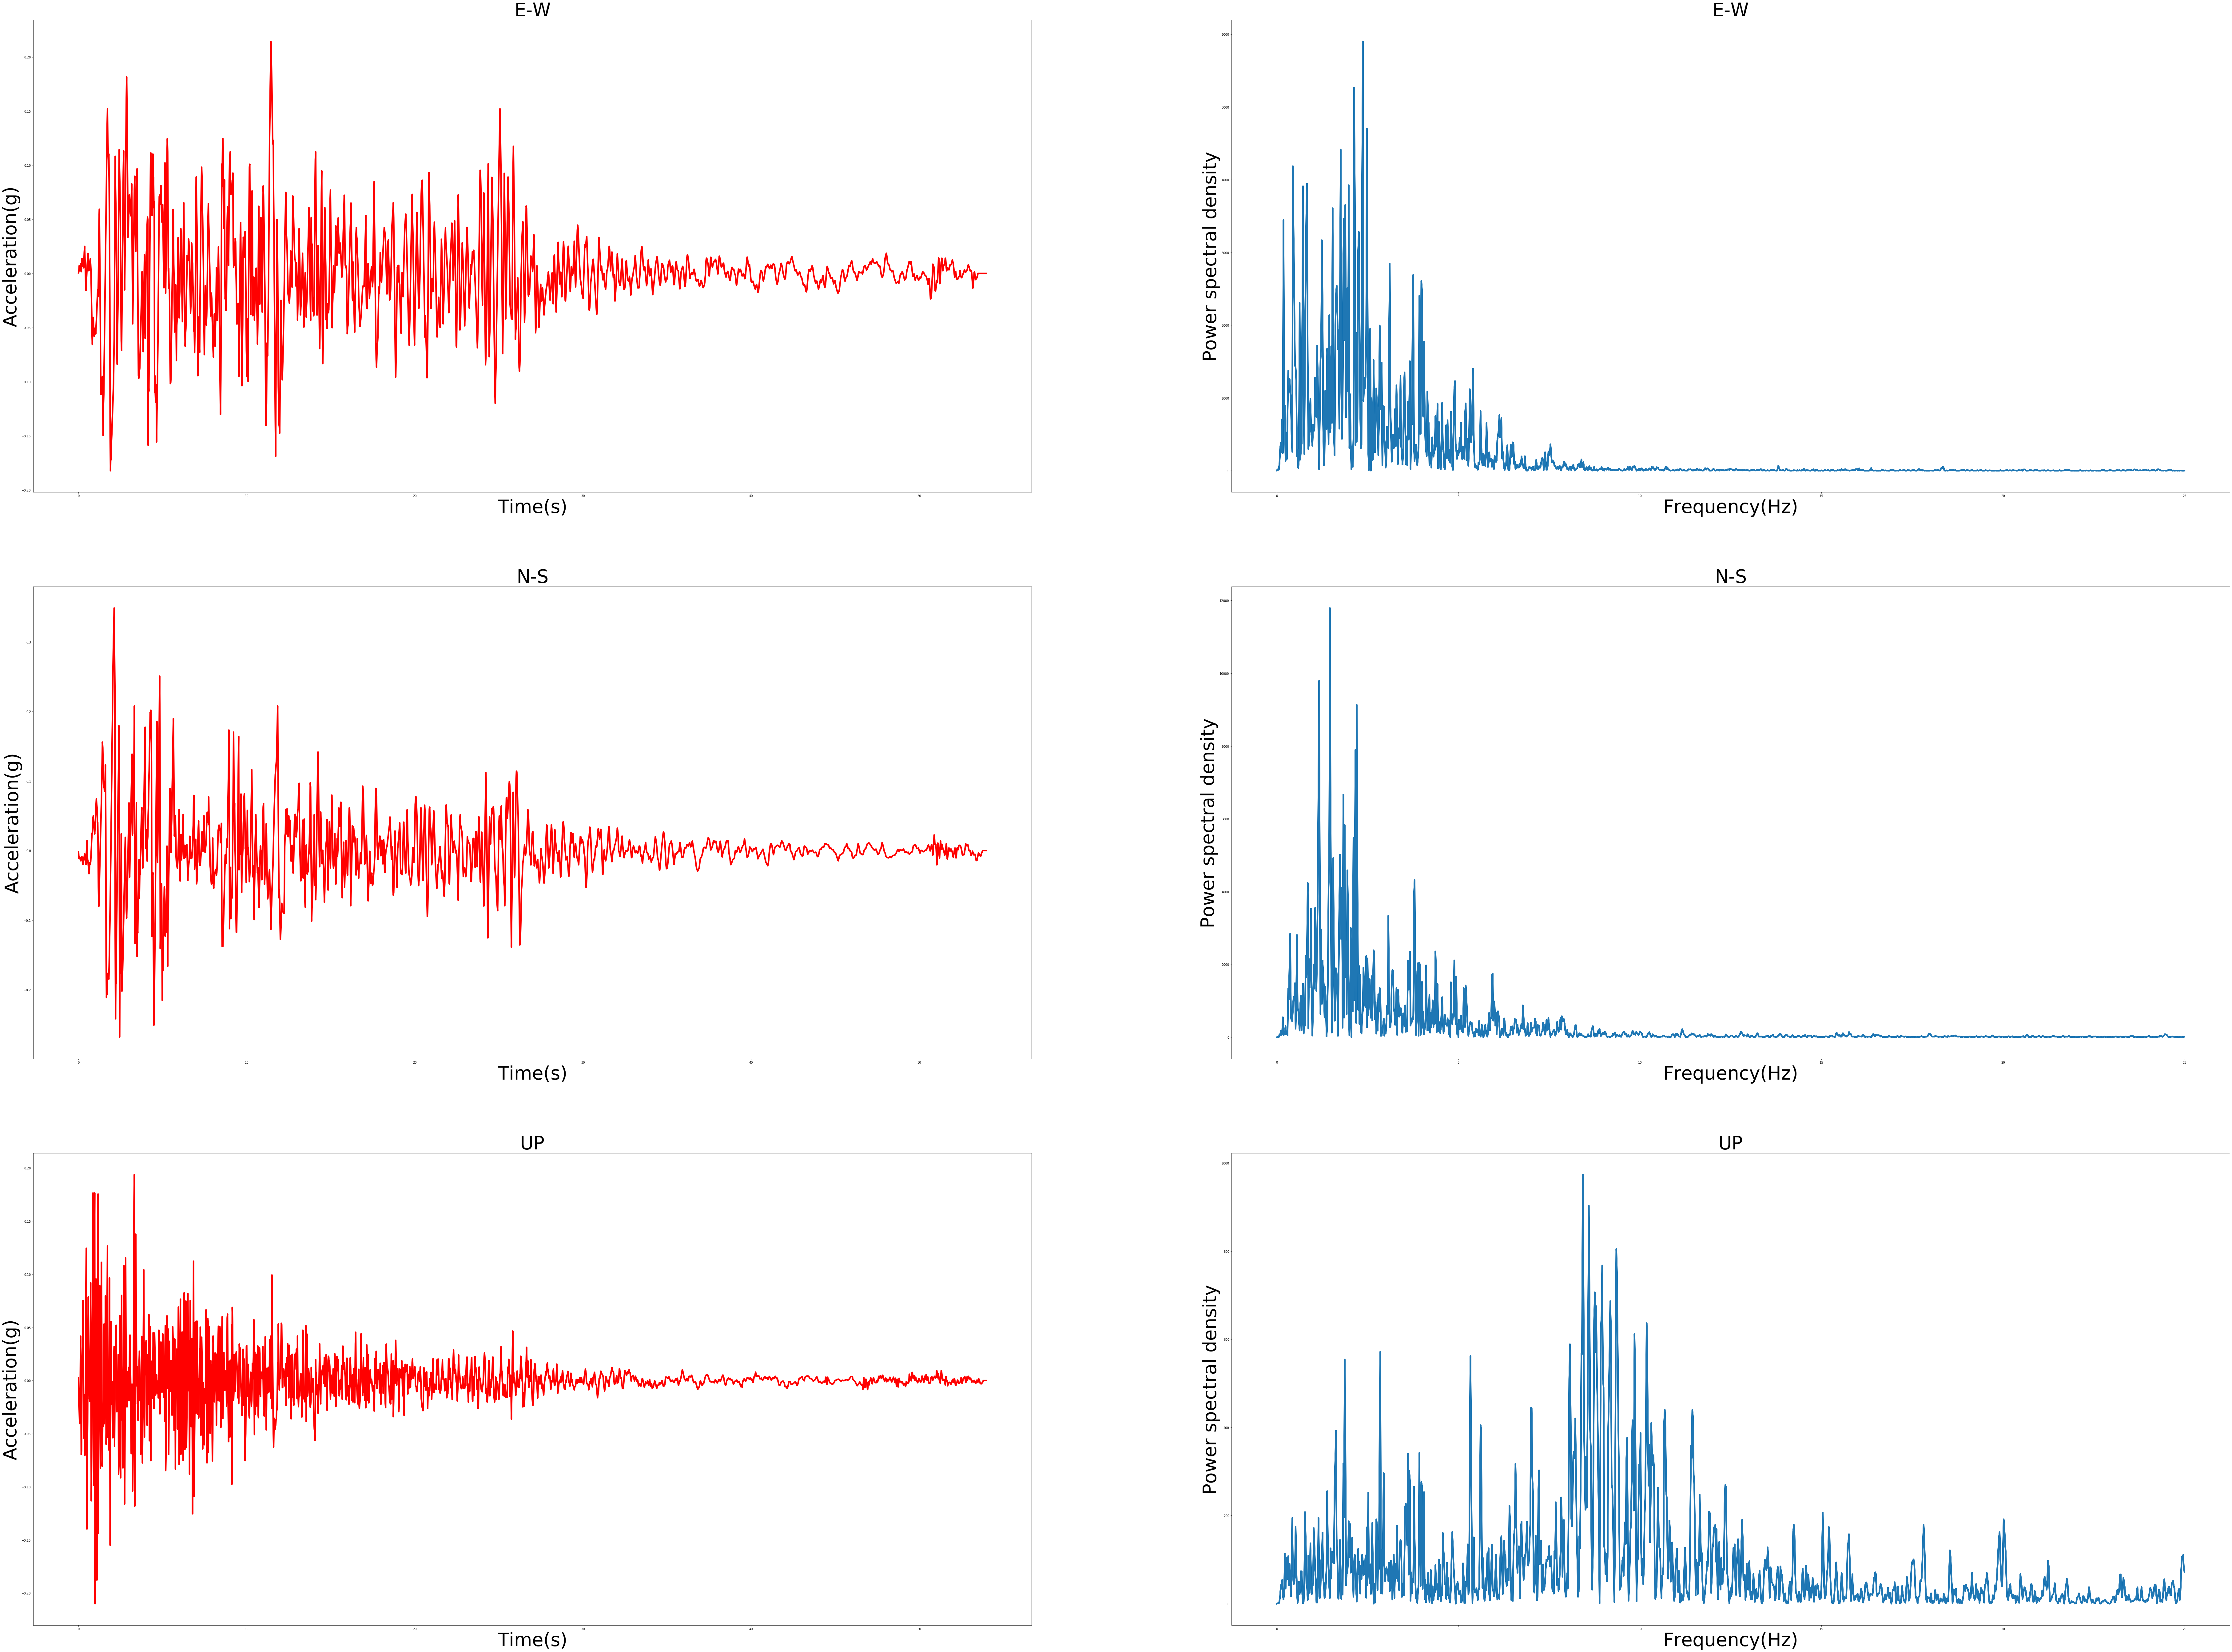

In [8]:
'''Plotting the accleration time and power spectrum of data.'''

plt.figure(figsize=(128,96))
for i in range(int(np.size(Input)/np.size(Input[0]))):
    t=np.linspace(0,54,np.size(Input[i]))
    plt.subplot(np.size(Input)/np.size(Input[0]), 2, 2*i+1)
    plt.plot(t,Input[i],linewidth=5,color='r')
    plt.xlabel('Time(s)',fontsize=60)
    plt.ylabel('Acceleration(g)',fontsize=60)
    plt.title(Directions[i],fontsize=60)
    ffta=np.fft.fft(Input[i])
    fftfreq=np.fft.fftfreq(np.size(Input[i]),0.02)
    Power_spectral=(ffta*np.conjugate(ffta))*54#power spectral density=amplitude^2/delta f where delta f=1/T where T=total time the  signal last
    plt.subplot(np.size(Input)/np.size(Input[i]),2,2*(i+1))
    plt.plot(abs(fftfreq),Power_spectral,linewidth=5)
    plt.xlabel('Frequency(Hz)',fontsize=60)
    plt.title(Directions[i],fontsize=60)
    plt.ylabel('Power spectral density',fontsize=60)

In [9]:
def plot_filtered_seismogram(data,lower_Freq,higher_Freq,Time_lag,order):
    plt.figure(figsize=(64,32))
    butter_filter=butter(order,Wn=(2*lower_Freq*Time_lag,2*higher_Freq*Time_lag),btype='bandpass')
    filtered_data=np.sqrt(8/3)*filtfilt(butter_filter[0],butter_filter[1],data)
    t=np.linspace(0,np.size(data)*Time_lag,np.size(data))
    plt.subplot(1, 2, 1)
    plt.plot(t,filtered_data,linewidth=5,color='r')
    plt.xlabel('Time(s)',fontsize=30)
    plt.ylabel('Acceleration(g)',fontsize=30)
    ffta=np.fft.fft(filtered_data)
    fftfreq=np.fft.fftfreq(np.size(filtered_data),Time_lag)
    Power_spectral=(ffta*np.conjugate(ffta))*54#power spectral density=amplitude^2/delta f where delta f=1/T where T=total time the  signal last
    plt.subplot(1,2,2)
    plt.plot(abs(fftfreq),Power_spectral,linewidth=5)
    plt.xlabel('Frequency(Hz)',fontsize=30)
    plt.ylabel('Power spectral density',fontsize=30)

In [10]:
from scipy.signal import hilbert

In [11]:
#Vectorizing accelerationa and time

accl_EW=np.array(accl_EW)
accl_NS=np.array(accl_NS)
accl_UP=np.array(accl_UP)
time=np.arange(0,54,0.02)


In [12]:
def normalize(data):
    avg=np.mean(data)
    std=np.std(data)
    norm=np.zeros_like(data)
    for i,j in enumerate(data):
        norm[i]=(j-avg)/std
    return norm
        

In [13]:
accl_EW_n=normalize(accl_EW)

In [14]:
def norm_2(data):
    lim_up=max(data)
    norm=np.zeros_like(data)
    for i,j in enumerate(data):
        norm[i]=j/lim_up
    return norm  

In [15]:
accl_EW_n=norm_2(accl_EW)

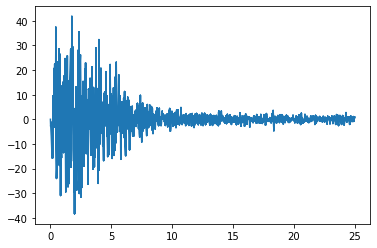

In [16]:
ffta=np.fft.fft(accl_EW_n)
fftfreq=np.fft.fftfreq(2700,0.02)
plt.plot(np.abs(fftfreq),ffta)

In [17]:
accl_x_env=hilbert(accl_EW_n)

In [18]:
y_2=np.sqrt(accl_x_env*np.conj(accl_x_env)+accl_EW_n**2)
thresh=np.mean(accl_EW)
print(thresh)

1.6447748512965281e-19


In [19]:
Deriv=np.diff(np.real(y_2))/0.02

In [20]:
for i in range(np.size(Deriv)):
    if y_2[i]<0.15:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])

0.04    (0.04791705429998355+0j)
0.06    (0.02718374637638695+0j)
0.12    (0.060208840744592415+0j)
0.14    (0.04896592402000938+0j)
0.22    (0.09487944981015475+0j)
0.24    (0.07275086306188579+0j)
0.28    (0.1028295481109589+0j)
0.44    (0.13426147628321233+0j)
0.46    (0.0700222518085377+0j)
3.24    (0.13736154910502374+0j)
3.7600000000000002    (0.10134601888940696+0j)
5.0600000000000005    (0.13717330871703284+0j)
6.48    (0.11463650747882041+0j)
6.5    (0.10644105303438625+0j)
10.52    (0.11119260158562483+0j)
10.540000000000001    (0.08347411881281847+0j)
12.42    (0.12571340626183147+0j)
12.64    (0.11052449788958092+0j)
12.66    (0.09838419212171039+0j)
12.86    (0.1465271993421236+0j)
13.26    (0.12911132472760553+0j)
13.280000000000001    (0.08561675981810035+0j)
13.46    (0.13095348068587134+0j)
14.200000000000001    (0.12208034576359371+0j)
15.16    (0.0957606865843204+0j)
15.6    (0.1384843802421986+0j)
15.620000000000001    (0.10268797592168152+0j)
15.64    (0.0716987718

49.54    (0.07382657626168367+0j)
49.56    (0.07035155634872367+0j)
49.58    (0.06451478622078323+0j)
49.6    (0.059256087466784825+0j)
49.620000000000005    (0.04632288411950135+0j)
49.64    (0.04074178692056011+0j)
49.74    (0.05440566112544301+0j)
49.76    (0.04964128448313747+0j)
49.78    (0.03512399570185676+0j)
49.800000000000004    (0.030869712089563867+0j)
49.82    (0.026944169304024882+0j)
49.94    (0.04536469604196277+0j)
49.96    (0.04408790802150199+0j)
49.980000000000004    (0.03520104769483555+0j)
50.0    (0.03193060162238008+0j)
50.06    (0.0307165791772816+0j)
50.08    (0.02834439866499155+0j)
50.1    (0.02145043850011373+0j)
50.120000000000005    (0.01675089036932572+0j)
50.14    (0.009197608983224368+0j)
50.52    (0.07311142414333818+0j)
50.54    (0.0686003732202445+0j)
50.56    (0.05963859728284535+0j)
50.72    (0.1478492665932854+0j)
50.74    (0.12452263452758587+0j)
50.76    (0.10167277196582836+0j)
50.78    (0.0904820881991628+0j)
50.800000000000004    (0.08599729

In [21]:
for i in range(np.size(Deriv)):
    if y_2[i]<0.15:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])
            break

0.04    (0.04791705429998355+0j)


In [22]:
for i in range(np.size(Deriv)):
    if y_2[i]>0.45 and y_2[i]>0.90:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])
            break

1.46    (1.0061268662195875+0j)


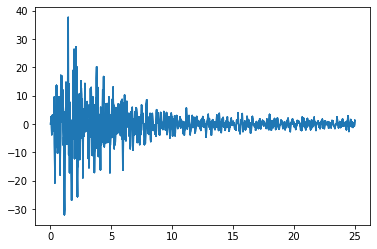

In [23]:
accl_NS_n=norm_2(accl_NS)
ffta=np.fft.fft(accl_NS_n)
fftfreq=np.fft.fftfreq(2700,0.02)
plt.plot(np.abs(fftfreq),ffta)

In [33]:
accl_x_env=hilbert(accl_NS_n)
y_2=np.sqrt(accl_x_env*np.conj(accl_x_env)+accl_EW_n**2)
thresh=np.mean(accl_NS)
print(thresh)
Deriv=np.diff(np.real(y_2))/0.02
for i in range(np.size(Deriv)):
    if y_2[i]<0.15:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])
            break

-2.4671622769447923e-19
0.04    (0.0451023888288865+0j)


In [74]:
for i in range(np.size(Deriv)):
    if y_2[i]>0.45 and y_2[i]<0.90:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])
            break

0.18    (0.4809763286673729+0j)


1.6447748512965281e-19
0.32    (0.14520406047982753+0j)
******************************


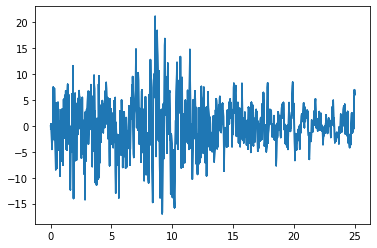

In [35]:
accl_UP_n=norm_2(accl_UP)
ffta=np.fft.fft(accl_UP_n)
fftfreq=np.fft.fftfreq(2700,0.02)
plt.plot(np.abs(fftfreq),ffta)
accl_x_env=hilbert(accl_UP_n)
y_2=np.sqrt(accl_x_env*np.conj(accl_x_env)+accl_EW_n**2)
thresh=np.mean(accl_EW)
print(thresh)
Deriv=np.diff(np.real(y_2))/0.02
for i in range(np.size(Deriv)):
    if y_2[i]<0.15:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])
            break
print('*'*30)


In [36]:
for i in range(np.size(Deriv)):
    if y_2[i]>0.45 and y_2[i]<0.90:
        if Deriv[i]<0:
            print(i*0.02,'  ',y_2[i])
            break

0.18    (0.4809763286673729+0j)


In [71]:
def new_P_and_S_return(accl_NS,accl_EW,accl_UP,time_period,thresh_p_high=0.15,thresh_s_low=0.45,thresh_s_high=0.90):
    '''accl_NS=acceleration in north south direction
    accl_EW=acceleration in east west direction
    accl_UP=acceleration in vertical direction
    time_period=time difference between two readings
    thresh_p_high=highest amplitude for p wave detection
    thresh_s_low=lowest amplitude threshold for s wave
    thresh_s_high=highest amplitude threshhold for s wave
    Returns index for p and s values in form of two arrays
    
    '''
    length=np.size(accl_NS)
    Input=np.zeros(shape=[3,length])
    Input_norm=np.zeros_like(Input)
    Input[0]=accl_NS
    Input[1]=accl_EW
    Input[2]=accl_UP
    p=list()
    s=list()
    Y_2_t=np.zeros_like(Input)
    
    for i in range(3):
        Input_norm[i]=Input[i]/max(abs(Input[i]))
    Envelope=np.zeros_like(Input)
    time=np.arange(0,length*time_period,time_period)
    for i in range(3):
        Envelope[i] =hilbert(Input_norm[i])
        Y_2_t[i]=np.sqrt(Input[i]**2+np.real(Envelope[i]*np.conjugate(Envelope[i])))
        thresh_p_low=np.mean(Input_norm[i,:60])
    for y in Y_2_t:
        
        print(max(abs(y)))
        
        Deriv=np.diff(y)/0.02
        
        for i in range(np.size(y)):
            if y[i]>thresh_p_low:
                if y[i]<thresh_p_high and Deriv[i]<0:
                    p.append(i)
                    break
        
        for i in range(np.size(y)):
            if y[i]>thresh_s_low:
                if y[i]<thresh_s_high and Deriv[i]<0:
                    s.append(i)
                    break
    return p,s
        
        
    

In [72]:
p,s=new_P_and_S_return(accl_NS,accl_EW,accl_UP,time_period=0.02,thresh_p_high=0.15,thresh_s_low=0.45,thresh_s_high=0.90)

1.05904840861291
1.0227159285216918
1.0218139315854875


C:\Users\anmol harshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


In [73]:
p,s

([1, 2, 16], [71, 67, 23])

In [65]:
    Input[0]=accl_NS
    Input[1]=accl_EW
    Input[2]=accl_UP
    p=list()
    s=list()
    Y_2_t=np.zeros_like(Input)
    
    for i in Input:
        i=i/max(abs(i))
        print(max(abs(i)))

1.0
1.0
1.0
0.21435454380998503


In [59]:
    for i in range(3):
        Envelope[i] =hilbert(Input[i])
        Y_2_t[i]=np.sqrt(Input[i]**2+Envelope[i]*np.conjugate(Envelope[i]))
        thresh_p_low=np.mean(Input[i][:60])
    for y in Y_2_t:
        
        print(max(abs(y)))

0.4931197253923966
0.30314310301237857
0.29699734268909483


C:\Users\anmol harshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [55]:
 Envelope=np.zeros_like(Input)

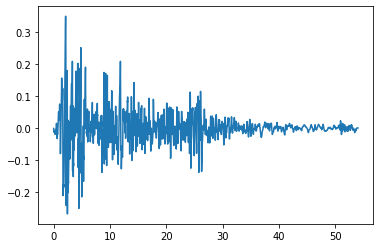

In [63]:
plt.plot(np.linspace(0,54,2700),Envelope[0])